In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
!dir

 Volume in drive F is DATA 02
 Volume Serial Number is 1C4F-CA87

 Directory of F:\PlayGround\customer-churn-ml-model

11/04/2023  03:21 PM    <DIR>          .
11/04/2023  03:21 PM    <DIR>          ..
11/03/2023  06:20 PM    <DIR>          .ipynb_checkpoints
11/03/2023  05:32 PM    <DIR>          data
11/04/2023  03:21 PM           111,735 main.ipynb
               1 File(s)        111,735 bytes
               4 Dir(s)  190,815,137,792 bytes free


In [60]:
telco_data = pd.read_csv('data\WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [62]:
#null value check 

In [63]:
telco_data.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

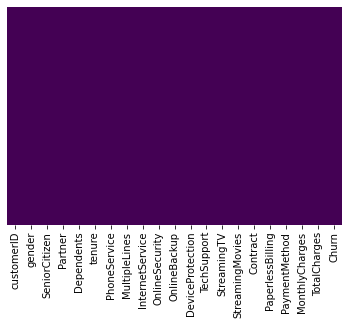

In [64]:
sns.heatmap(telco_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [65]:
#Exploritory Data

<AxesSubplot:xlabel='Churn', ylabel='count'>

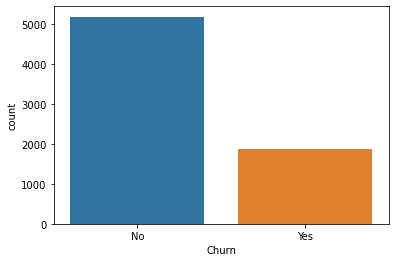

In [66]:
sns.countplot(x='Churn', data = telco_data)

<AxesSubplot:xlabel='Churn', ylabel='count'>

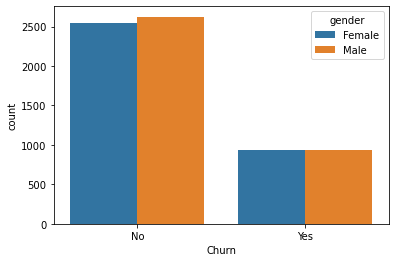

In [67]:
sns.countplot(x='Churn', hue='gender', data = telco_data)

In [68]:
#Data preprocessing with data mapping

In [69]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
yes_no_mapping = {'Yes': 1, 'No': 0}

telco_data['Partner'] = telco_data['Partner'].map(yes_no_mapping)
telco_data['Dependents'] = telco_data['Dependents'].map(yes_no_mapping)
telco_data['PhoneService'] = telco_data['PhoneService'].map(yes_no_mapping)

In [71]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [72]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
internet_service_mapping = {'Yes': 1, 'No': 0, 'No internet service' : 0}

telco_data['OnlineSecurity'] = telco_data['OnlineSecurity'].map(internet_service_mapping)
telco_data['OnlineBackup'] = telco_data['OnlineBackup'].map(internet_service_mapping)
telco_data['DeviceProtection'] = telco_data['DeviceProtection'].map(internet_service_mapping)
telco_data['TechSupport'] = telco_data['TechSupport'].map(internet_service_mapping)
telco_data['StreamingTV'] = telco_data['StreamingTV'].map(internet_service_mapping)
telco_data['StreamingMovies'] = telco_data['StreamingMovies'].map(internet_service_mapping)

phone_service_mapping = {'Yes': 1, 'No': 0, 'No phone service' : 0}
telco_data['MultipleLines'] = telco_data['MultipleLines'].map(phone_service_mapping)


In [74]:
telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [75]:
dsl_fiber_mapping = {'DSL': 1, 'Fiber optic': 1, 'No': 0}
telco_data['InternetService'] = telco_data['InternetService'].map(dsl_fiber_mapping)

In [76]:
telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,1,1,1,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,0,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [77]:
contract_mapping = {'Month-to-month': 'MM', 'One year':'OY', 'Two year': 'TY'}
telco_data['Contract'] = telco_data['Contract'].map(contract_mapping)

In [79]:
telco_data['PaperlessBilling'] = telco_data['PaperlessBilling'].map(yes_no_mapping)

In [80]:
telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,MM,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,OY,0,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,MM,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,OY,0,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,MM,1,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,1,1,1,OY,1,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,0,1,1,OY,1,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,0,0,0,0,MM,1,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,0,0,0,0,MM,1,Mailed check,74.40,306.6,Yes


In [82]:
pyment_mappying = {'Bank transfer (automatic)': 'Bank', 'Credit card (automatic)': 'Card', 'Electronic check': 'Check', 'Mailed check': 'Check'}

telco_data['PaymentMethod'] = telco_data['PaymentMethod'].map(pyment_mappying)

In [84]:
telco_data['Churn'] = telco_data['Churn'].map(yes_no_mapping)

In [85]:
telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,MM,1,Check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,OY,0,Check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,MM,1,Check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,OY,0,Bank,42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,MM,1,Check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,1,1,1,OY,1,Check,84.80,1990.5,0
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,0,1,1,OY,1,Card,103.20,7362.9,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,0,0,0,0,MM,1,Check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,0,0,0,0,MM,1,Check,74.40,306.6,1


In [86]:
#dummy variable

In [89]:
sex = pd.get_dummies(telco_data['gender'], drop_first=True)
sex

,Male
0,0
1,1
2,1
3,1
4,0
...,...
7038,1
7039,0
7040,0
7041,1


In [90]:
contract = pd.get_dummies(telco_data['Contract'], drop_first=True)
contract

,OY,TY
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
7038,1,0
7039,1,0
7040,0,0
7041,0,0


In [91]:
paymethod = pd.get_dummies(telco_data['PaymentMethod'], drop_first=True)
paymethod

,Card,Check
0,0,1
1,0,1
2,0,1
3,0,0
4,0,1
...,...,...
7038,0,1
7039,1,0
7040,0,1
7041,0,1


In [92]:
# concatenate sex, contract, paymethod to telco_data

In [93]:
telco_data = pd.concat([telco_data,sex,contract,paymethod], axis=1)
telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,OY,TY,Card,Check
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,1,Check,29.85,29.85,0,0,0,0,0,1
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,0,Check,56.95,1889.5,0,1,1,0,0,1
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,1,Check,53.85,108.15,1,1,0,0,0,1
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,0,Bank,42.30,1840.75,0,1,1,0,0,0
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,1,Check,70.70,151.65,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,Check,84.80,1990.5,0,1,1,0,0,1
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,Card,103.20,7362.9,0,0,1,0,1,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,1,Check,29.60,346.45,0,0,0,0,0,1
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,1,Check,74.40,306.6,1,1,0,0,0,1


In [ ]:
telco_data.drop(['customerID', 'gender', 'PaymentMethod', 'Contract'], axis=1, inplace=True)